Set up environment and load in data

In [2]:
library(tidyverse)
library(brms)
library(here)
library(grid)
library(gridExtra)
library(lemon)
theme_set(theme_bw())
helpers_path = paste0(here(),'/analysis/helpers/')
inputs_path = paste0(here(),'/inputs/')
source(paste0(helpers_path, '01_clean_behavioral_data.R'))
fig_out_path = paste0(here(), '/outputs/fig/')
rm(data_bc_clean)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.2     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.2     v tibble    3.2.1
v lubridate 1.9.2     v tidyr     1.3.0
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: Rcpp

Loading 'brms' package (version 2.19.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attaching package: 'brms'


The following object is masked from 'package:stats':

    ar



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine



Attaching package: 'lemon'


The following object is maske

[1] "Done loading data."
[1] "Resetting helpers path..."


In [3]:
data_yn_clean = data_yn_clean %>%
  mutate(correct = ifelse(possiblePayoff>reference & yesChosen == 1, 1, ifelse(possiblePayoff < reference & yesChosen == 0, 1, 0))) %>%
  mutate(type_chr = ifelse(type == 1, "Over Exposure", "Regular Exposure"),
         week = ifelse(week == 1, "Week 1", ifelse(week == 2, "Week 2", ifelse(week == 3, "Week 3", NA))),
         week = factor(week, levels = c("Week 1", "Week 2", "Week 3"))) %>%
  mutate(val_diff = possiblePayoff - reference,
         abs_val_diff = abs(possiblePayoff - reference),
         val_diff_bin = round(val_diff/50),
         val_diff_bin_str = paste0(val_diff_bin*50-25,":",val_diff_bin*50+25),
         val_diff_bin_str = factor(val_diff_bin_str, levels = c("-225:-175", "-175:-125", "-125:-75", "-75:-25", "-25:25", "25:75", "75:125", "125:175", "175:225")),
         time_bin = ifelse(day == 1, "Day 1", ifelse(day == 2, "Day 2", ifelse(day == 3, "Day 3", ifelse((day > 3) & (day < 8), "Week 2", "Week 3"))))) %>%
  mutate(subject = recode(subnum, 
                    `601` = "Subject 1", 
                    `609` = "Subject 2",
                    `611` = "Subject 3",
                    `619` = "Subject 4",
                    `621` = "Subject 5",
                    `629` = "Subject 6"))

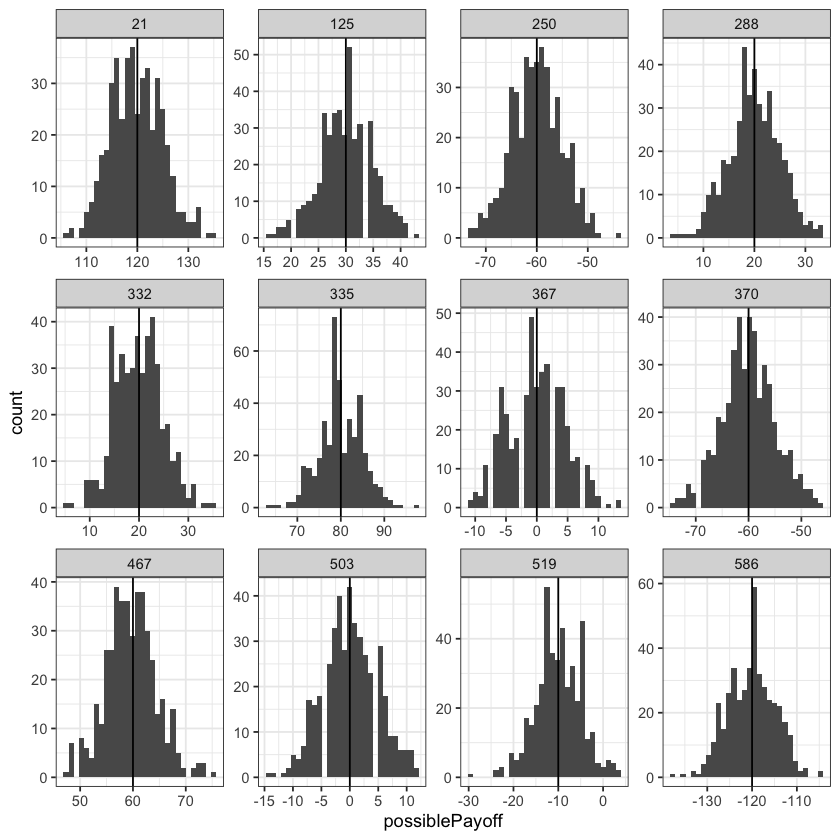

In [4]:
data_yn_clean %>%
  filter(subnum == 611 & type == 1) %>%
  mutate(trueVal = 100 * (valueO + valueF + valueS)/2) %>%
  ggplot(aes(possiblePayoff))+
  geom_histogram(bins = 30)+
  geom_vline(aes(xintercept = trueVal))+
  facet_wrap(~stimNum, scales = "free")

In [5]:
data_yn_clean %>%
  mutate(trueVal = round(100 * (valueO + valueF + valueS)/2) )%>%
  select(trueVal, possiblePayoff, val_diff, val_diff_bin_str)

trueVal,possiblePayoff,val_diff,val_diff_bin_str
<dbl>,<int>,<int>,<fct>
10,12,12,-25:25
-60,-60,-60,-75:-25
-100,-108,-108,-125:-75
60,57,57,25:75
-10,-9,-9,-25:25
0,3,3,-25:25
90,81,81,75:125
0,-2,-2,-25:25
10,21,21,-25:25


# Psychometrics

In [6]:
sub_summary = data_yn_clean %>%
  mutate(time_bin = ifelse(day == 1, "Day 1", ifelse(day == 2, "Day 2", ifelse(day == 3, "Day 3", ifelse((day > 3) & (day < 8), "Week 2", "Week 3")))),
         time_bin = factor(time_bin, levels = c("Week 3", "Week 2", "Week 1", "Day 3", "Day 2", "Day 1"))) %>%
  group_by(subject, time_bin, val_diff_bin_str, val_diff_bin, type_chr) %>%
  summarise(mean_y = mean(yesChosen),
            sem_y = sd(yesChosen)/sqrt(n()),
            .groups="keep") %>%
  mutate(val_diff_bin = val_diff_bin * 50) 

sub_summary

subject,time_bin,val_diff_bin_str,val_diff_bin,type_chr,mean_y,sem_y
<chr>,<fct>,<fct>,<dbl>,<chr>,<dbl>,<dbl>
Subject 1,Week 3,-225:-175,-200,Regular Exposure,0.000000000,0.000000000
Subject 1,Week 3,-175:-125,-150,Over Exposure,0.000000000,0.000000000
Subject 1,Week 3,-175:-125,-150,Regular Exposure,0.000000000,0.000000000
Subject 1,Week 3,-125:-75,-100,Over Exposure,0.000000000,0.000000000
Subject 1,Week 3,-125:-75,-100,Regular Exposure,0.000000000,0.000000000
Subject 1,Week 3,-75:-25,-50,Over Exposure,0.008571429,0.004934517
Subject 1,Week 3,-75:-25,-50,Regular Exposure,0.007168459,0.005059741
Subject 1,Week 3,-25:25,0,Over Exposure,0.240484429,0.017791965
Subject 1,Week 3,-25:25,0,Regular Exposure,0.326732673,0.023363480


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


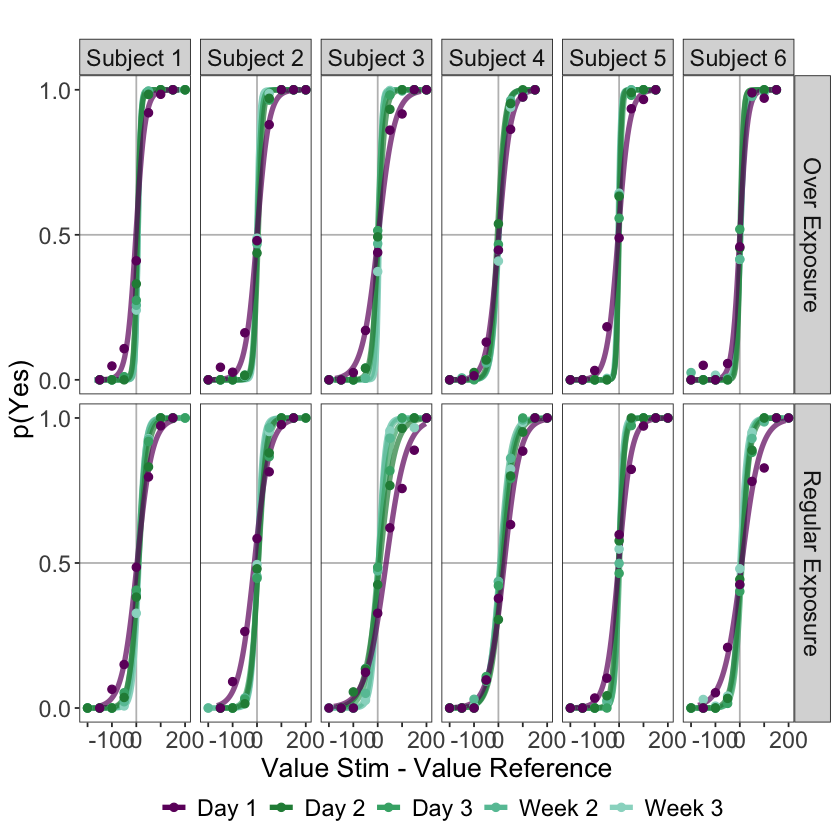

In [7]:
data_yn_clean%>%
  mutate(time_bin = factor(time_bin, levels = c("Week 3", "Week 2", "Week 1", "Day 3", "Day 2", "Day 1"))) %>%
  ggplot() +
  geom_hline(aes(yintercept =.5), color="gray")+
  geom_vline(aes(xintercept = 0), color="gray")+
  geom_line(aes(val_diff, yesChosen, color = time_bin, alpha = time_bin), stat="smooth", method = "glm", method.args = list(family = "binomial"), formula = "y ~ x", se = FALSE, size = 1.5)+
  geom_point(data = sub_summary, aes(val_diff_bin, mean_y, color = time_bin), size = 2)+
  facet_grid(type_chr ~ subject)+
  labs(x = "Value Stim - Value Reference", y = "p(Yes)", title="", color = "")+
  theme(panel.grid = element_blank(),
        legend.position = "bottom",
        axis.text = element_text(size = 14),
        strip.text = element_text(size = 14),
        axis.title = element_text(size = 16),
        legend.text = element_text(size = 14),
        legend.box.margin=margin(t = -10),
        legend.spacing.y = unit(-0.25, "cm"),
        legend.box="vertical")+
  scale_color_manual(values = c("#6e016b", "#238b45", "#41ae76", "#66c2a4", "#99d8c9"),
                     breaks = c("Day 1", "Day 2", "Day 3", "Week 2", "Week 3"))+
  scale_alpha_manual(values = c(1, .7, .7, .7, .7))+
  scale_y_continuous(breaks = seq(0,1,.5))+
  scale_x_continuous(breaks = c(-200, -100, 0, 100, 200),
                     labels = c("", "-100", "0", "", "200"))+
  guides(alpha = "none")

# ggsave(file=paste0(fig_out_path, 'isdn_yn_subj_pYesOverValDiffAcrossTime.jpg'), height = 5, width = 12, units="in")

Plot the numerical value of the slopes and intercepts for each of these logits


In [8]:
k = length(unique(data_yn_clean$time_bin)) # number of factor levels

my_helmert = matrix(c(4/5, -1/5, -1/5, -1/5, -1/5,
                      0, 3/4, -1/4, -1/4, -1/4,
                      0, 0, 2/3, -1/3, -1/3,
                      0, 0, 0, 1/2, -1/2), ncol = k-1)

my_helmert


0.8,0.00,0.0000000,0.0
-0.2,0.75,0.0000000,0.0
-0.2,-0.25,0.6666667,0.0
-0.2,-0.25,-0.3333333,0.5
-0.2,-0.25,-0.3333333,-0.5


In [9]:
str(data_yn_clean$type)

 int [1:52600] 0 0 0 0 0 1 0 0 0 1 ...


In [10]:
fn_draws = paste0(inputs_path, 'yn_logit_norm_bydays_bytype_helmert_draws.csv')

if(file.exists(fn_draws)){
  yn_logit_draws = read.csv(fn_draws)
} else{
  subnums = unique(data_yn_clean$subnum)
  types = unique(data_yn_clean$type)
  normMax = 1
  normMinDay = 0
  normMinVal = -1
  
  yn_logit_draws = tibble()
  
  for(cur_sub in subnums){
    for(cur_type in types){
      cur_dat = data_yn_clean %>%
        ungroup() %>%
        filter(subnum == cur_sub & type == cur_type) %>%
        mutate(time_bin = as.factor(time_bin)) %>%
        group_by(day) %>% # Grouping by day to normalize valdiff matters. This makes sure every day ranges [-1,1]
        mutate(norm_valDiff = (normMax - normMinVal) / (max(val_diff) - min(val_diff)) * (val_diff - max(val_diff)) + (normMax)) %>%
        ungroup() %>%
        select(yesChosen, norm_valDiff, time_bin, type)
      
      contrasts(cur_dat$time_bin) = my_helmert
      
      cur_m <- brm(formula = yesChosen ~ norm_valDiff * time_bin,
                   data= cur_dat,
                   family = bernoulli(link = "logit"),
                   warmup = 500,
                   iter = 2500,
                   chains = 4,
                   init = "0",
                   cores = 4,
                   seed = 389253)
      
      cur_draws = as_draws_df(cur_m)
      cur_draws$subnum = cur_sub
      cur_draws$type = cur_type
      
      yn_logit_draws = rbind(yn_logit_draws, cur_draws) 
    }
  }
  names(yn_logit_draws) = gsub(":", ".", names(yn_logit_draws))
  write.csv(yn_logit_draws, fn_draws, row.names = F)
  
  rm(cur_dat, cur_m, cur_draws, cur_sub)
}

In [11]:
yn_par_summary = as_tibble(yn_logit_draws) %>%
  select(-lprior, -lp__, -.chain, -.iteration, -.draw) %>%
  gather(key, value, -subnum, -type) %>%
  mutate(key=recode(key, 
                    "b_Intercept" = "Intercept", 
                    "b_norm_valDiff"  = "Value Diff [-1, 1]",
                    "b_time_bin1" = "Day 1 vs Later",
                    "b_time_bin2" = "Day 2 vs Later",
                    "b_time_bin3" = "Day 3 vs Later",
                    "b_time_bin4" = "Week 2 vs Later",
                    "b_norm_valDiff.time_bin1" = "Value Diff x Day 1 vs Later",
                    "b_norm_valDiff.time_bin2" = "Value Diff x Day 2 vs Later",
                    "b_norm_valDiff.time_bin3" = "Value Diff x Day 3 vs Later",
                    "b_norm_valDiff.time_bin4" = "Value Diff x Week 2 vs Later",
                    ),
         key = factor(key, levels = c("Intercept", "Value Diff [-1, 1]", "Day 1 vs Later", "Day 2 vs Later", "Day 3 vs Later", "Week 2 vs Later", "Value Diff x Day 1 vs Later", "Value Diff x Day 2 vs Later", "Value Diff x Day 3 vs Later", "Value Diff x Week 2 vs Later"))) %>%
  group_by(subnum, type, key) %>%
  summarise(.groups = 'keep',
            m = mean(value),
            l95 = HDInterval::hdi(value)[1],
            h95 = HDInterval::hdi(value)[2]) %>%
  mutate(subnum = as.factor(subnum),
         task = "Y/N") 

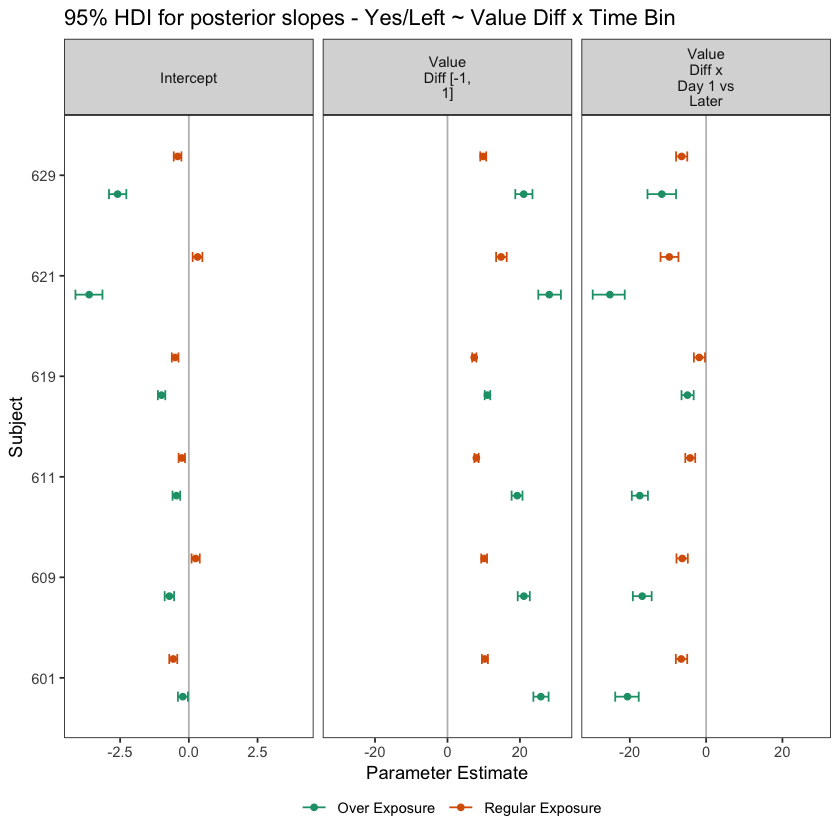

In [12]:
yn_par_summary %>%
  mutate(type_chr = ifelse(type == 0, "Regular Exposure", "Over Exposure")) %>%
  filter(key %in% c("Intercept", "Value Diff [-1, 1]", "Value Diff x Day 1 vs Later")) %>%
  ggplot(aes(m, subnum, color = type_chr)) +
  geom_vline(aes(xintercept = 0), color = "gray") + 
  geom_point(position = position_dodge(width=.75))+
  geom_errorbarh(aes(xmin = l95, xmax = h95, height=.2), position = position_dodge(width=.75))+
  facet_wrap(~key, scales = 'free_x',labeller = labeller(key = label_wrap_gen(10))) +
  labs(x = "Parameter Estimate", y = "Subject", color = "", title = "95% HDI for posterior slopes - Yes/Left ~ Value Diff x Time Bin") +
  theme(legend.position = "bottom",
        panel.grid = element_blank(),
        legend.box.margin=margin(t = -10))+
  scale_x_symmetric(mid=0)+
  scale_color_brewer(palette = "Dark2")